In [1]:
# Tensorflow Interactive Session 시작
import tensorflow as tf
sess = tf.InteractiveSession()

In [2]:
x = tf.placeholder(tf.float32, [100, 32, 32, 3])

# tf.layers.conv2d

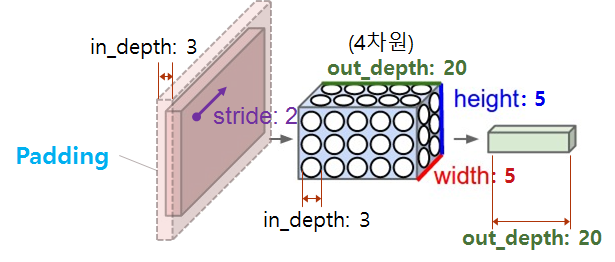

**conv2d(**<br>
    inputs,<br>
    filters,<br>
    kernel_size,<br>
    strides=(1, 1),<br>
    padding='valid',<br>
    data_format='channels_last',<br>
    dilation_rate=(1, 1),<br>
    activation=None,<br>
    use_bias=True,<br>
    kernel_initializer=None,<br>
    bias_initializer=tf.zeros_initializer(),<br>
    kernel_regularizer=None,<br>
    bias_regularizer=None,<br>
    activity_regularizer=None,<br>
    trainable=True,<br>
    name=None,<br>
    reuse=None<br>
**)**

https://www.tensorflow.org/api_docs/python/tf/layers/conv2d

# Activations
- tf.nn.relu
- tf.tanh
- tf.sigmoid

# Kernel_initializers / Bias_initializers
- tf.zeros_initializer
- tf.ones_initializer
- tf.constant_initializer
- tf.random_uniform_initializer
- tf.random_normal_initializer
- tf.truncated_normal_initializer

In [3]:
net = tf.layers.conv2d(x, 
                       20, 
                       [5,5], 
                       strides=[2,2], 
                       padding='SAME', 
                       activation=tf.tanh,
                       kernel_initializer=tf.truncated_normal_initializer(stddev=0.1),
                       bias_initializer=tf.zeros_initializer(),
                       name='conv1')
net

<tf.Tensor 'conv1/Tanh:0' shape=(100, 16, 16, 20) dtype=float32>

<연습문제>
1. 아래와 같은 조건의  netx = tf.layers.conv2d(net, ...  를 선언해봅시다.
    - outdepth 30
    - kernel 크기는 [7,7]
    - strides는 [2,2]
    - padding은 'VALID'
    - activation은 ReLU
    - kernel_initialzer는 random_uniform
    - bias_initializer는 ones

In [4]:
netx = tf.layers.conv2d(x,
                        30,
                        [7,7],
                        strides = [2,2],
                        padding = 'VALID',
                        activation = tf.nn.relu,
                        kernel_initializer = tf.random_uniform_initializer(),
                        bias_initializer = tf.ones_initializer(),
                        name='conv2'
                       )
netx

<tf.Tensor 'conv2/Relu:0' shape=(100, 13, 13, 30) dtype=float32>

# Batch Normalization

In [5]:
is_training = tf.placeholder(tf.bool)

net = tf.layers.conv2d(x, 
                       20, 
                       [5,5], 
                       strides=[2,2], 
                       padding='SAME', 
                       #activation=tf.tanh,
                       activation=None,
                       kernel_initializer=tf.truncated_normal_initializer(stddev=0.1),
                       bias_initializer=tf.zeros_initializer(),
                       name='conv3')
net = tf.layers.batch_normalization(net, training=is_training)
net = tf.tanh(net)
net

<tf.Tensor 'Tanh:0' shape=(100, 16, 16, 20) dtype=float32>

<연습문제>
1. 아래와 같은 조건의 convolutional layer 'netx'를 선언해봅시다.
    - batch normalization 적용
    - 이외 모든 조건은 위와 동일

In [6]:
is_training = tf.placeholder(tf.bool)

netx = tf.layers.conv2d(x,
                        30,
                        [7,7],
                        strides = [2,2],
                        padding = 'VALID',
                        activation = None,
                        kernel_initializer = tf.random_uniform_initializer(),
                        bias_initializer = tf.ones_initializer(),
#                         name='conv7'
                       )
netx = tf.layers.batch_normalization(netx, training=is_training)
netx = tf.nn.relu(netx)
netx

<tf.Tensor 'Relu:0' shape=(100, 13, 13, 30) dtype=float32>

# Weight Decay

In [ ]:
WEIGHT_DECAY = 0.0005
var_list = [v for v in tf.trainable_variables()]
l2_loss = tf.add_n([ tf.nn.l2_loss(v) for v in var_list
                     if 'kernel' in v.name ]) * WEIGHT_DECAY
loss += l2_loss

In [7]:
var_list = [v for v in tf.trainable_variables()]
var_list

[<tf.Variable 'conv1/kernel:0' shape=(5, 5, 3, 20) dtype=float32_ref>,
 <tf.Variable 'conv1/bias:0' shape=(20,) dtype=float32_ref>,
 <tf.Variable 'conv2/kernel:0' shape=(7, 7, 3, 30) dtype=float32_ref>,
 <tf.Variable 'conv2/bias:0' shape=(30,) dtype=float32_ref>,
 <tf.Variable 'conv3/kernel:0' shape=(5, 5, 3, 20) dtype=float32_ref>,
 <tf.Variable 'conv3/bias:0' shape=(20,) dtype=float32_ref>,
 <tf.Variable 'batch_normalization/beta:0' shape=(20,) dtype=float32_ref>,
 <tf.Variable 'batch_normalization/gamma:0' shape=(20,) dtype=float32_ref>,
 <tf.Variable 'conv2d/kernel:0' shape=(7, 7, 3, 30) dtype=float32_ref>,
 <tf.Variable 'conv2d/bias:0' shape=(30,) dtype=float32_ref>,
 <tf.Variable 'batch_normalization_1/beta:0' shape=(30,) dtype=float32_ref>,
 <tf.Variable 'batch_normalization_1/gamma:0' shape=(30,) dtype=float32_ref>]

<연습문제>
1. 'bias'의 l2_loss도 loss에 추가해봅시다. 참조: print(var_list)

In [ ]:
WEIGHT_DECAY = 0.0005
var_list = [v for v in tf.trainable_variables()]
l2_loss = tf.add_n([ tf.nn.l2_loss(v) for v in var_list
                     if 'kernel' in v.name or 'bias' in v.name ]) * WEIGHT_DECAY
loss += l2_loss

# tf.layers.max_pooling2d

**max_pooling2d(**<br>
    inputs,<br>
    pool_size,<br>
    strides,<br>
    padding='valid',<br>
    data_format='channels_last',<br>
    name=None<br>
**)**

https://www.tensorflow.org/api_docs/python/tf/layers/max_pooling2d

In [8]:
net = tf.layers.max_pooling2d(net,
                              [3,3],
                              strides=[2,2],
                              padding='VALID',
                              name='pool1')
net

<tf.Tensor 'pool1/MaxPool:0' shape=(100, 7, 7, 20) dtype=float32>

<연습문제>
1. kernel [2,2], stride [2,2], padding='VALID'의 max pooling layer를 선언해봅시다. (netx = ...)

In [10]:
netx = tf.layers.max_pooling2d(netx, 
                               [2,2], 
                               strides=[2,2], 
                               padding='VALID', 
                               name='pool2')
netx

<tf.Tensor 'pool2/MaxPool:0' shape=(100, 6, 6, 30) dtype=float32>

In [18]:
net = tf.reshape(net, [-1, 7*7*20])
net

<tf.Tensor 'Reshape:0' shape=(100, 980) dtype=float32>

# tf.layers.dense

**dense(**<br>
    inputs,<br>
    units,<br>
    activation=None,<br>
    use_bias=True,<br>
    kernel_initializer=None,<br>
    bias_initializer=tf.zeros_initializer(),<br>
    kernel_regularizer=None,<br>
    bias_regularizer=None,<br>
    activity_regularizer=None,<br>
    trainable=True,<br>
    name=None,<br>
    reuse=None<br>
**)**

https://www.tensorflow.org/api_docs/python/tf/layers/dense

In [ ]:
net = tf.layers.dense(net,
                      128,
                      activation=tf.nn.tanh,
                      kernel_initializer=tf.truncated_normal_initializer(stddev=0.1),
                      bias_initializer=tf.constant_initializer(0.1),
                      name='fc3')
net

<연습문제>
1. 아래와 같은 조건의  netx = tf.layers.dense(net, ...  를 선언해봅시다.
    - outdepth 10
    - activation은 ReLU
    - kernel_initialzer는 truncated_normal
    - bias_initializer는 constant 0.2

In [17]:
netx = tf.layers.dense(netx,
                      10,
                      activation = tf.nn.relu,
                      kernel_initializer = tf.truncated_normal_initializer(stddev=0.1),
                      bias_initializer = tf.constant_initializer(0.2),)
netx

<tf.Tensor 'dense_7/Relu:0' shape=(100, 6, 6, 10) dtype=float32>

# tf.layers.dropout

dropout(
    inputs,
    rate=0.5,
    noise_shape=None,
    seed=None,
    training=False,
    name=None
)

https://www.tensorflow.org/api_docs/python/tf/layers/dropout

In [ ]:
is_training = tf.placeholder(tf.bool)

net = tf.layers.dropout(net,
                        rate=0.5,
                        training=is_training,
                        name='drop3')
net

# model save/restore

In [ ]:
NUM_EPOCHS = 1
CHECKPOINT_PATH = './checkpoints'

import os
if not os.path.isdir(CHECKPOINT_PATH):
  os.makedirs(CHECKPOINT_PATH)

In [ ]:
# Initialize an saver for store model checkpoints
saver = tf.train.Saver()

**tf.train.Saver.save(**<br>
    sess,<br>
    save_path,<br>
    global_step=None,<br>
    latest_filename=None,<br>
    meta_graph_suffix='meta',<br>
    write_meta_graph=True,<br>
    write_state=True<br>
**)**

In [ ]:
global_step = tf.Variable(0, trainable=False, dtype=tf.float32, name='global_step')

In [ ]:
sess = tf.Session(config=tf.ConfigProto(allow_soft_placement=True, gpu_options={'allow_growth':True}))

In [ ]:
init_op = tf.group(tf.global_variables_initializer(),
                 tf.local_variables_initializer())
sess.run(init_op)

In [ ]:
for epoch in range(0, NUM_EPOCHS):
    checkpoint_name = os.path.join(CHECKPOINT_PATH,
                        'example_ep-'+str(epoch+1)+'_step')
    save_path = saver.save(sess, checkpoint_name, global_step=global_step)
    print("Epoch: %d, Model checkpoint saved at %s" % (epoch+1, save_path))

**tf.train.Saver.restore(**<br>
    sess,<br>
    save_path<br>
**)**

In [ ]:
latest_ckpt = tf.train.latest_checkpoint(CHECKPOINT_PATH)
print("Loading the last checkpoint: " + latest_ckpt)
saver.restore(sess, latest_ckpt)

# TFRecords input pipelines ...